In [178]:
import pandas as pd
df = pd.read_csv('data/cleaned/races.csv')
print(len(df))

# Remove rows where "winner_party" or "runner_up_party" is "Other"
df = df[(df['winner_party'] != 'Other') & (df['runner_up_party'] != 'Other')]
print(len(df))

2480
2319


In [179]:
df

,race_id,district_id,year,total_votes,winner_name,winner_party,runner_up_name,runner_up_party,margin_of_victory,spending_winner,spending_runner_up,pvi,NHE
0,AK_0_2010,AK_0,2010,254335,DON YOUNG,Republican,HARRY T CRAWFORD JR,Democrat,38.44,887310.33,235571.43,13.0,6.8
1,AK_0_2012,AK_0,2012,289804,DON YOUNG,Republican,SHARON M CISSNA,Democrat,35.32,665974.39,24388.00,13.0,-1.1
2,AK_0_2014,AK_0,2014,279741,DON YOUNG,Republican,FORREST DUNBAR,Democrat,10.00,809039.20,230088.83,12.0,5.7
3,AK_0_2016,AK_0,2016,308198,DON YOUNG,Republican,STEVE LINDBECK,Democrat,14.30,1322055.12,1098098.09,12.0,1.1
4,AK_0_2018,AK_0,2018,282166,DON YOUNG,Republican,ALYSE S GALVIN,Democrat,6.58,1387687.05,1943398.59,9.0,-8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,WY_0_2012,WY_0,2012,250700,CYNTHIA M LUMMIS,Republican,CHRIS HENRICHSEN,Democrat,43.43,631025.66,0.00,20.0,-1.1
2476,WY_0_2014,WY_0,2014,171153,CYNTHIA M LUMMIS,Republican,RICHARD GRAYSON,Democrat,43.96,300949.02,0.00,22.0,5.7
2477,WY_0_2016,WY_0,2016,258788,LIZ CHENEY,Republican,RYAN GREENE,Democrat,31.19,2148255.72,186092.78,22.0,1.1
2478,WY_0_2018,WY_0,2018,201245,LIZ CHENEY,Republican,GREG HUNTER,Democrat,33.82,715739.91,47069.51,25.0,-8.6


In [180]:
df['adjusted_margin'] = df.apply(lambda row: 
    round(row['margin_of_victory'] - row['pvi'] - row['NHE'], 2) if row['winner_party'] == 'Republican' else
    round(row['margin_of_victory'] + row['pvi'] + row['NHE'], 2) if row['winner_party'] == 'Democrat' else
    float('nan'), axis=1)

In [181]:
df

,race_id,district_id,year,total_votes,winner_name,winner_party,runner_up_name,runner_up_party,margin_of_victory,spending_winner,spending_runner_up,pvi,NHE,adjusted_margin
0,AK_0_2010,AK_0,2010,254335,DON YOUNG,Republican,HARRY T CRAWFORD JR,Democrat,38.44,887310.33,235571.43,13.0,6.8,18.64
1,AK_0_2012,AK_0,2012,289804,DON YOUNG,Republican,SHARON M CISSNA,Democrat,35.32,665974.39,24388.00,13.0,-1.1,23.42
2,AK_0_2014,AK_0,2014,279741,DON YOUNG,Republican,FORREST DUNBAR,Democrat,10.00,809039.20,230088.83,12.0,5.7,-7.70
3,AK_0_2016,AK_0,2016,308198,DON YOUNG,Republican,STEVE LINDBECK,Democrat,14.30,1322055.12,1098098.09,12.0,1.1,1.20
4,AK_0_2018,AK_0,2018,282166,DON YOUNG,Republican,ALYSE S GALVIN,Democrat,6.58,1387687.05,1943398.59,9.0,-8.6,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,WY_0_2012,WY_0,2012,250700,CYNTHIA M LUMMIS,Republican,CHRIS HENRICHSEN,Democrat,43.43,631025.66,0.00,20.0,-1.1,24.53
2476,WY_0_2014,WY_0,2014,171153,CYNTHIA M LUMMIS,Republican,RICHARD GRAYSON,Democrat,43.96,300949.02,0.00,22.0,5.7,16.26
2477,WY_0_2016,WY_0,2016,258788,LIZ CHENEY,Republican,RYAN GREENE,Democrat,31.19,2148255.72,186092.78,22.0,1.1,8.09
2478,WY_0_2018,WY_0,2018,201245,LIZ CHENEY,Republican,GREG HUNTER,Democrat,33.82,715739.91,47069.51,25.0,-8.6,17.42


# taking the most contested races

In [182]:
df_subset = df[df['adjusted_margin'].abs() < 10]
df_subset = df_subset[df_subset['year'] >= 2012]
print(len(df_subset))

560


In [184]:
# Group by district_id and filter out districts with only one unique year
districts_to_keep = df_subset.groupby('district_id')['year'].nunique() > 1
df_subset = df_subset[df_subset['district_id'].isin(districts_to_keep[districts_to_keep].index)]
print(len(df_subset))

476


In [185]:
df_subset

,race_id,district_id,year,total_votes,winner_name,winner_party,runner_up_name,runner_up_party,margin_of_victory,spending_winner,spending_runner_up,pvi,NHE,adjusted_margin
2,AK_0_2014,AK_0,2014,279741,DON YOUNG,Republican,FORREST DUNBAR,Democrat,10.00,809039.20,230088.83,12.0,5.7,-7.70
3,AK_0_2016,AK_0,2016,308198,DON YOUNG,Republican,STEVE LINDBECK,Democrat,14.30,1322055.12,1098098.09,12.0,1.1,1.20
4,AK_0_2018,AK_0,2018,282166,DON YOUNG,Republican,ALYSE S GALVIN,Democrat,6.58,1387687.05,1943398.59,9.0,-8.6,6.18
5,AK_0_2020,AK_0,2020,353165,DON YOUNG,Republican,ALYSE S GALVIN,Democrat,9.14,1817836.79,5162902.93,9.0,-3.1,3.24
43,AR_2_2014,AR_2,2014,237330,FRENCH HILL,Republican,PATRICK HENRY HAYS,Democrat,8.26,2149743.85,1563841.26,8.0,5.7,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,WA_1_2016,WA_1,2016,349398,SUZAN K DELBENE,Democrat,ROBERT J SUTHERLAND,Republican,10.83,1625142.38,28942.99,-4.0,1.1,7.93
2363,WA_1_2018,WA_1,2018,332743,SUZAN DELBENE,Democrat,JEFFREY BEELER,Republican,18.54,1558467.49,18808.39,-6.0,-8.6,3.94
2364,WA_1_2020,WA_1,2020,426862,SUZAN K DELBENE,Democrat,JEFFREY BEELER SR,Republican,17.23,1903677.43,62279.24,-6.0,-3.1,8.13
2405,WA_8_2018,WA_8,2018,313057,KIM SCHRIER,Democrat,DINO ROSSI,Republican,4.83,8075093.38,4821393.10,0.0,-8.6,-3.77


In [187]:
for year in df_subset['year'].unique():
    numberRaces = len(df_subset[df_subset['year'] == year])
    print(year, "---", numberRaces)


2014 --- 81
2016 --- 77
2018 --- 124
2020 --- 114
2012 --- 80


In [188]:
df_subset.to_csv('data/cleaned/most_contested_races.csv', index=False)

# graphs

In [190]:
df_subset['spending_ratio'] = df_subset['spending_winner'] / df_subset['spending_runner_up']

/tmp/ipykernel_60963/2533204379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['spending_ratio'] = df_subset['spending_winner'] / df_subset['spending_runner_up']


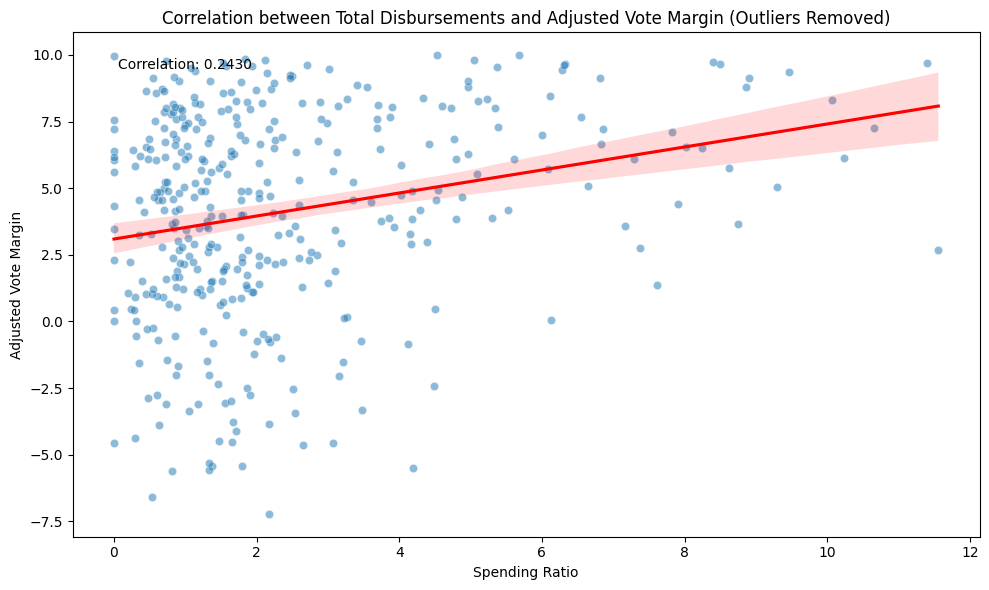

Correlation between spending_ratio and adjusted_margin (outliers removed): 0.2430
Number of data points removed as outliers: 90


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from both spending_ratio and adjusted_margin
df_no_outliers = remove_outliers(df_subset, 'spending_ratio')
df_no_outliers = remove_outliers(df_no_outliers, 'adjusted_margin')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='spending_ratio', y='adjusted_margin', alpha=0.5)

# Add a regression line
sns.regplot(data=df_no_outliers, x='spending_ratio', y='adjusted_margin', scatter=False, color='red')

# Set labels and title
plt.xlabel('Spending Ratio')
plt.ylabel('Adjusted Vote Margin')
plt.title('Correlation between Total Disbursements and Adjusted Vote Margin (Outliers Removed)')

# Calculate and display the correlation coefficient
correlation = df_no_outliers['spending_ratio'].corr(df_no_outliers['adjusted_margin'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes, 
         verticalalignment='top')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient and the number of removed outliers
print(f"Correlation between spending_ratio and adjusted_margin (outliers removed): {correlation:.4f}")
print(f"Number of data points removed as outliers: {len(df_subset) - len(df_no_outliers)}")